In [ ]:
#Importing libraries
!pip install opencv-python
!pip install pandas
import cv2
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [ ]:
#connect to google drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


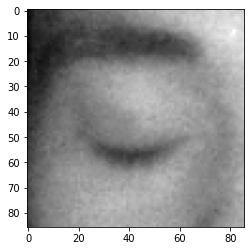

In [ ]:
# Load the Drive helper and mount
img_array = cv2.imread('/content/drive/MyDrive/Dataset/Drowsiness/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap="gray")

In [ ]:
img_array.shape

(86, 86)

In [ ]:
import os

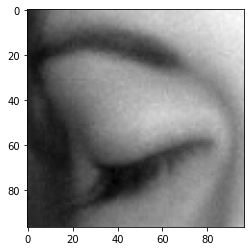

In [ ]:
Datadirectory = r'/content/drive/MyDrive/Dataset/Drowsiness/train'
Classes = ['Closed_Eyes', 'Open_Eyes']
# Datadirectory = 'dataset_new/train/'
# Classes = ['Closed', 'Open']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

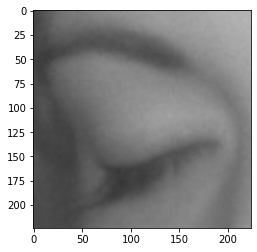

In [ ]:
#Resizing the image to standard size
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [ ]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass

In [ ]:
create_training_data()
print(len(training_data))

4000


In [ ]:
import random
random.shuffle(training_data)
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape
(4000, 224, 224, 3)
X = X/255.0
Y = np.array(y)

In [ ]:
#Checking installation of tensorflow for training
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

     |████████████████████████████████| 462 kB 9.8 MB/s 


In [ ]:

!pip install cython h5py --user

In [ ]:
#creating instance for neural network model
model = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [ ]:
#Flattening layers 
#Calling activation function for classification purposes

Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
#creating a new instance of the model to fit the data
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [ ]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.1)

Epoch 1/2
113/113 [==============================] - 42s 201ms/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.0055 - val_accuracy: 0.9950
Epoch 2/2
113/113 [==============================] - 21s 186ms/step - loss: 2.0347e-05 - accuracy: 1.0000 - val_loss: 9.5586e-06 - val_accuracy: 1.0000


In [ ]:
#saving my trained model
new_model.save('my_model.h5')

In [ ]:
#Loading my trained model
new_model = tf.keras.models.load_model('my_model.h5')

Real-time analysis starts here

In [ ]:
def start_camera():
  '''cap = cv2.VideoCapture(0) # using default camera
  cap.set(3,640) # width is id no 3
  cap.set(4,480) # height is id no 4
  cap.set(10,100) # Brightness id is 10

  counter=0
  frame_check=20
  i=0  #Frame_Counter
  while True:
    success, img = cap.read()
    if success==False:
      print('Camera opening failed')
      break
    cv2.imwrite('/content/drive/MyDrive/Dataset/Drowsiness/Live/live'+str(i)+'.png',img)
    #cv2.imshow("Output",img)
    img_array = cv2.imread('/content/drive/MyDrive/Dataset/Drowsiness/Live/live'+str(i)+'.png' , cv2.IMREAD_GRAYSCALE)
    i+=1
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
    new_array = cv2.resize(backtorgb, (img_size, img_size))   #resize

    X_input = np.array(new_array).reshape(1, img_size, img_size, 3)  #reshape
    #Prediction
    prediction = my_predict(X_input)
    if prediction == 'closed':
      counter+=1
      #if counter >= frame_check:
			  #cv2.putText(img, "****************ALERT!****************", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
				#cv2.putText(img, "****************ALERT!****************", (10,325),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    else:
      counter=0
 
    cv2.imshow("Frame", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      cv2.destroyAllWindows()
      cap.release()
      break'''

In [ ]:
#Prediction 
def my_predict(X_input):
  X_input = X_input/255.0  #To get a value between 0 - 1
  prediction_val = new_model.predict(X_input)
  print(prediction_val)
  if prediction_val <0.5:
    prediction="closed"
  elif prediction_val >=0.5:
    prediction="Opened"


  return (prediction)

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

Reading video stream from Camera


In [ ]:
#JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
        
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))

  return data

In [ ]:
def get_vid():

# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  counter = 0 
  alert=''
  frame_check=20
  i=0
  while True:
      js_reply = video_frame(label_html, alert)
      if not js_reply:
          break

    # convert JS response to OpenCV Image
      img = js_to_image(js_reply["img"])


    # grayscale image for face detection
      img_array = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


      i+=1
      backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
      new_array = cv2.resize(backtorgb, (img_size, img_size))   #resize

      X_input = np.array(new_array).reshape(1, img_size, img_size, 3)  #reshape
    #Prediction
      prediction = my_predict(X_input)
      print(prediction)
      if prediction == 'closed':
        counter+=1
        if counter >= frame_check:
          print('alert!')
          cv2.putText(img, "****************ALERT!****************", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
          cv2.putText(img, "****************ALERT!****************", (10,325),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
      else:
        counter=0
      


  

In [ ]:
def main():
  while True:
    choice= input('Start driving? (yes/no): ')
    if choice=='yes' or choice=='Yes':
      get_vid()
    elif choice =='no' or choice == 'No':
      print('Bye!')
      break
    else:
      print('Wrong input.')

if __name__ == "__main__":
    main()

Start driving? (yes/no): yes


<IPython.core.display.Javascript object>

[[0.99997914]]
Opened
[[0.9999995]]
Opened
[[0.9999404]]
Opened
[[0.9999975]]
Opened
[[0.9999889]]
Opened
[[0.9999763]]
Opened
[[0.99998605]]
Opened
[[0.9999865]]
Opened
[[0.9999479]]
Opened
[[0.99997973]]
Opened
[[0.9999293]]
Opened
[[0.999923]]
Opened
[[0.99999964]]
Opened
[[0.99999976]]
Opened
[[1.]]
Opened
[[0.9999932]]
Opened
[[0.9999989]]
Opened
[[0.99999857]]
Opened
[[0.99999905]]
Opened
[[0.9995396]]
Opened
[[0.99997294]]
Opened
[[0.99999666]]
Opened
[[0.99999297]]
Opened
[[0.9999999]]
Opened
[[0.99999714]]
Opened
[[0.99999976]]
Opened
[[0.9999999]]
Opened
[[0.9999403]]
Opened
[[0.9904109]]
Opened
[[0.99999535]]
Opened
[[0.9999988]]
Opened
[[0.9998771]]
Opened
[[0.99979025]]
Opened
[[0.99850637]]
Opened
[[0.97544914]]
Opened
[[0.08687789]]
closed
[[0.99375993]]
Opened
[[0.9977458]]
Opened
[[0.99987674]]
Opened
[[0.9995377]]
Opened
[[0.9997546]]
Opened
[[0.9874422]]
Opened
[[0.90668315]]
Opened
[[0.8597787]]
Opened
[[0.7550116]]
Opened
[[0.5352205]]
Opened
[[0.47302252]]
closed
